In [ ]:
import tensorflow
tensorflow.__version__

# 딥러닝 기본

## 패션 MNIST

* 머신러닝의 기본 데이터셋은 붓꽃 데이터셋, 보스톤집값
* 딥러닝의 기본 데이터셋은 MNIST 데이터셋이 유명합니다. 

## 데이터 로드

In [1]:
from tensorflow import keras

#이미 4등분으로 나누어줌
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:

#훈련 데이터 크기 확인
#훈련 데이터는 6만개의 이미지로 이루어짐
#각 이미지는 28 * 28크기

#타깃도 6만개의 원소가 있는 1차원 배열

X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

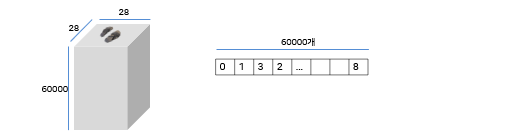

In [4]:

# 1만개의 이미지로 이루어짐
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
X_train.dtype

dtype('uint8')

In [7]:
X_train[0].shape

(28, 28)

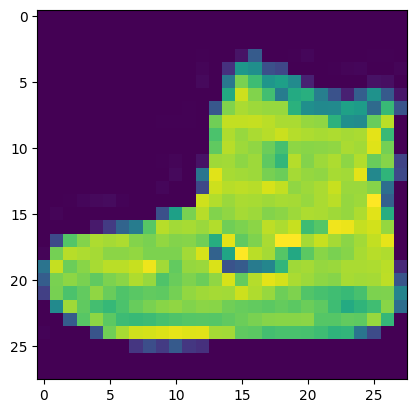

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

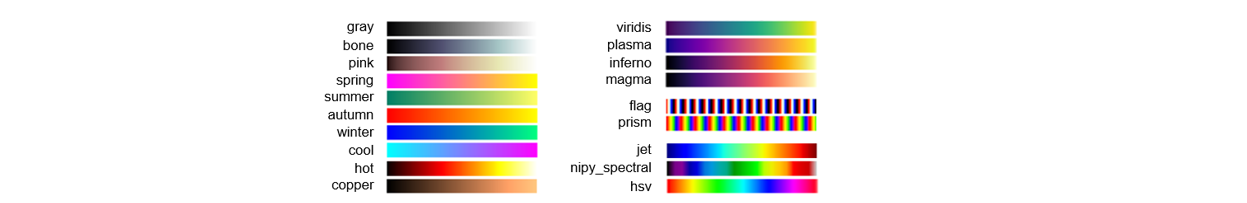

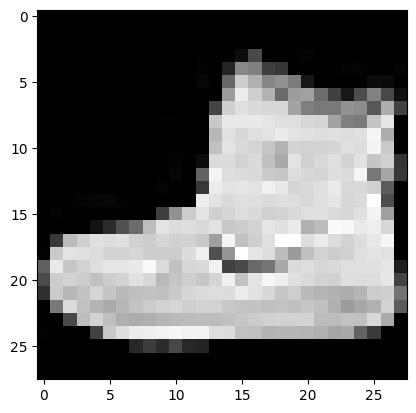

In [9]:
plt.imshow(X_train[0],cmap='gray')

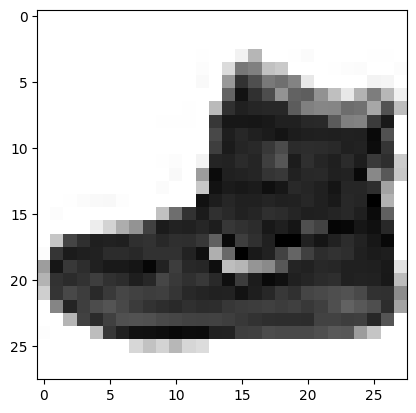

In [10]:
plt.imshow(X_train[0],cmap='gray_r')

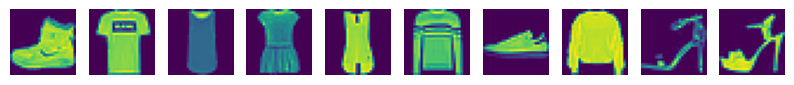

In [11]:
#이미지 출력

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(X_train[i])
    axs[i].axis('off')
plt.show()

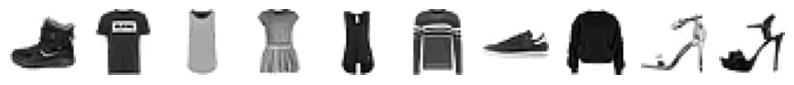

In [12]:
#이미지 출력

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(X_train[i], cmap='gray_r') #0~255값으로 이루어진 데이터, 출력을 했을 때 흑색이 눈에 보이려면 반전
    axs[i].axis('off')
plt.show()

In [13]:
#10개의 샘플에 대한 타깃값
print([y_train[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


[레이블 값]
* 0:티셔츠
* 1:바지
* 2:스웨터
* 3:드레스
* 4:코트
* 5:샌달
* 6:셔츠
* 7:스티커즈
* 8:가방
* 9:앵클부츠

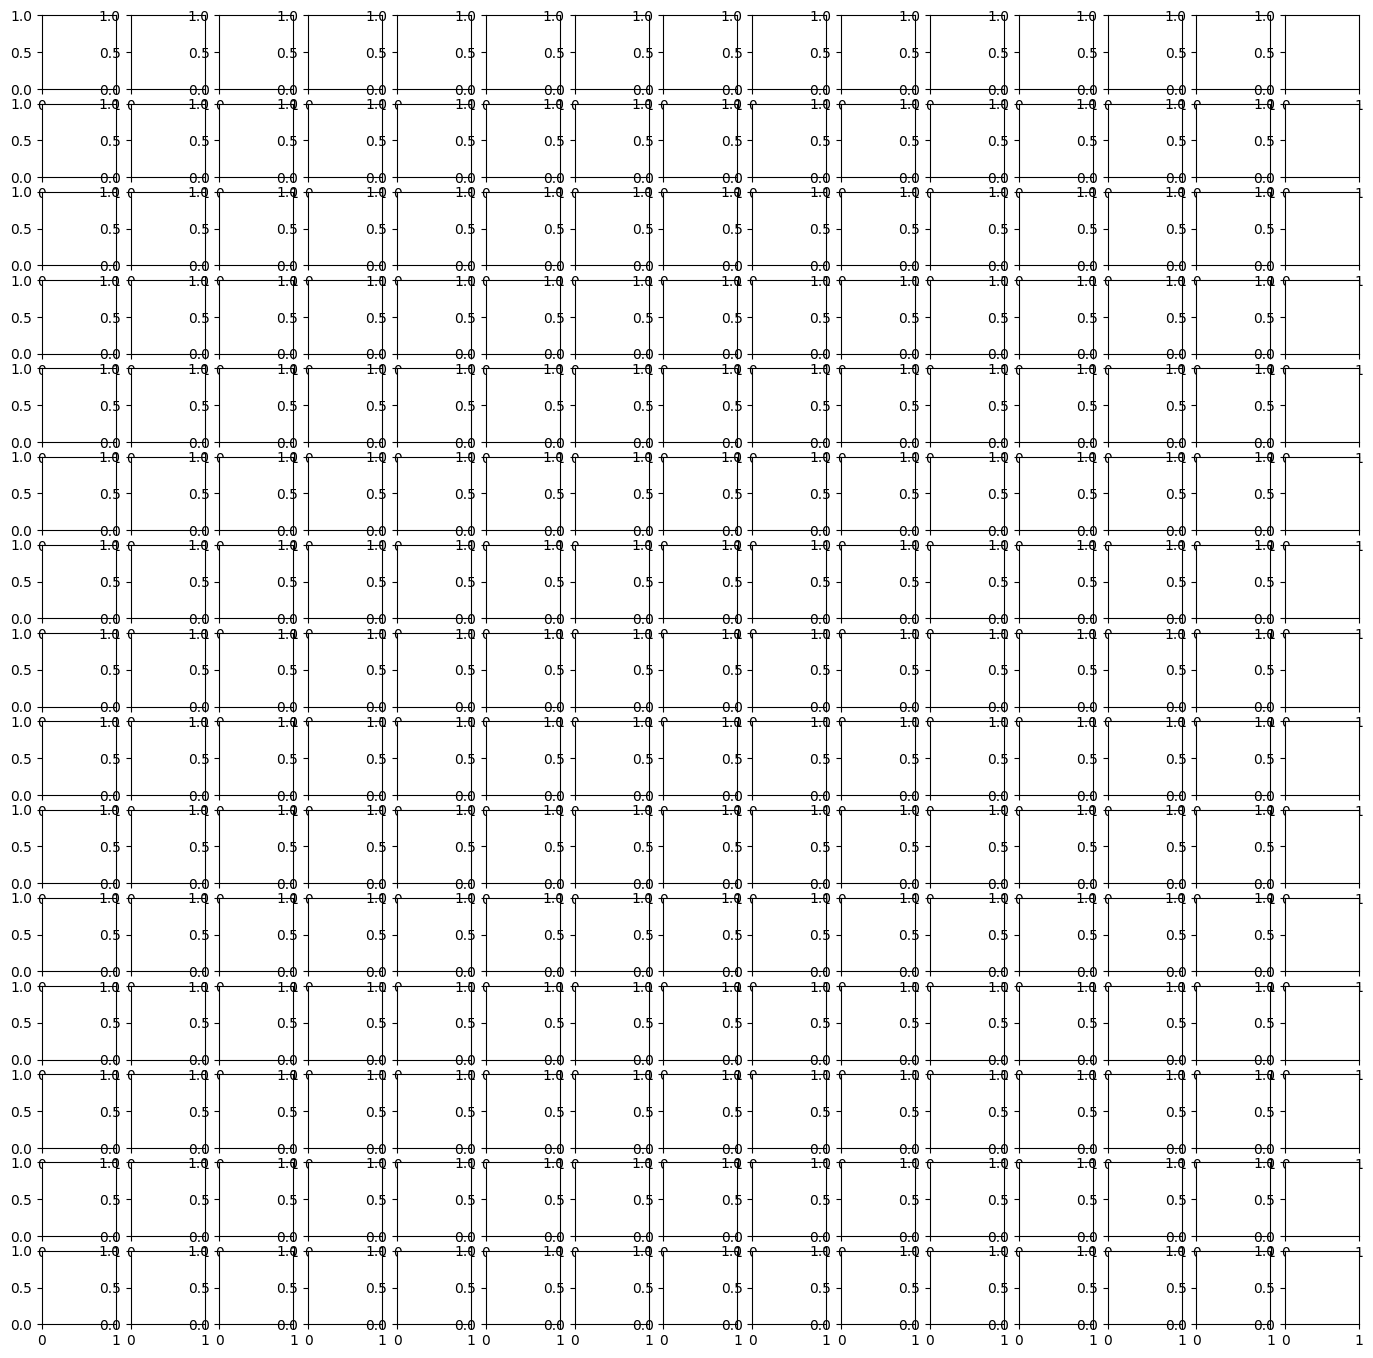

In [14]:
L_grid = 15
W_grid = 15
fig, axes = plt.subplots(L_grid,W_grid,figsize=(17,17))
plt.show()

In [16]:
axes.shape, type(axes)

((15, 15), numpy.ndarray)

In [18]:
axes = axes.ravel() # 2D축을 벡터로 차원 변환

In [19]:
axes.shape

(225,)

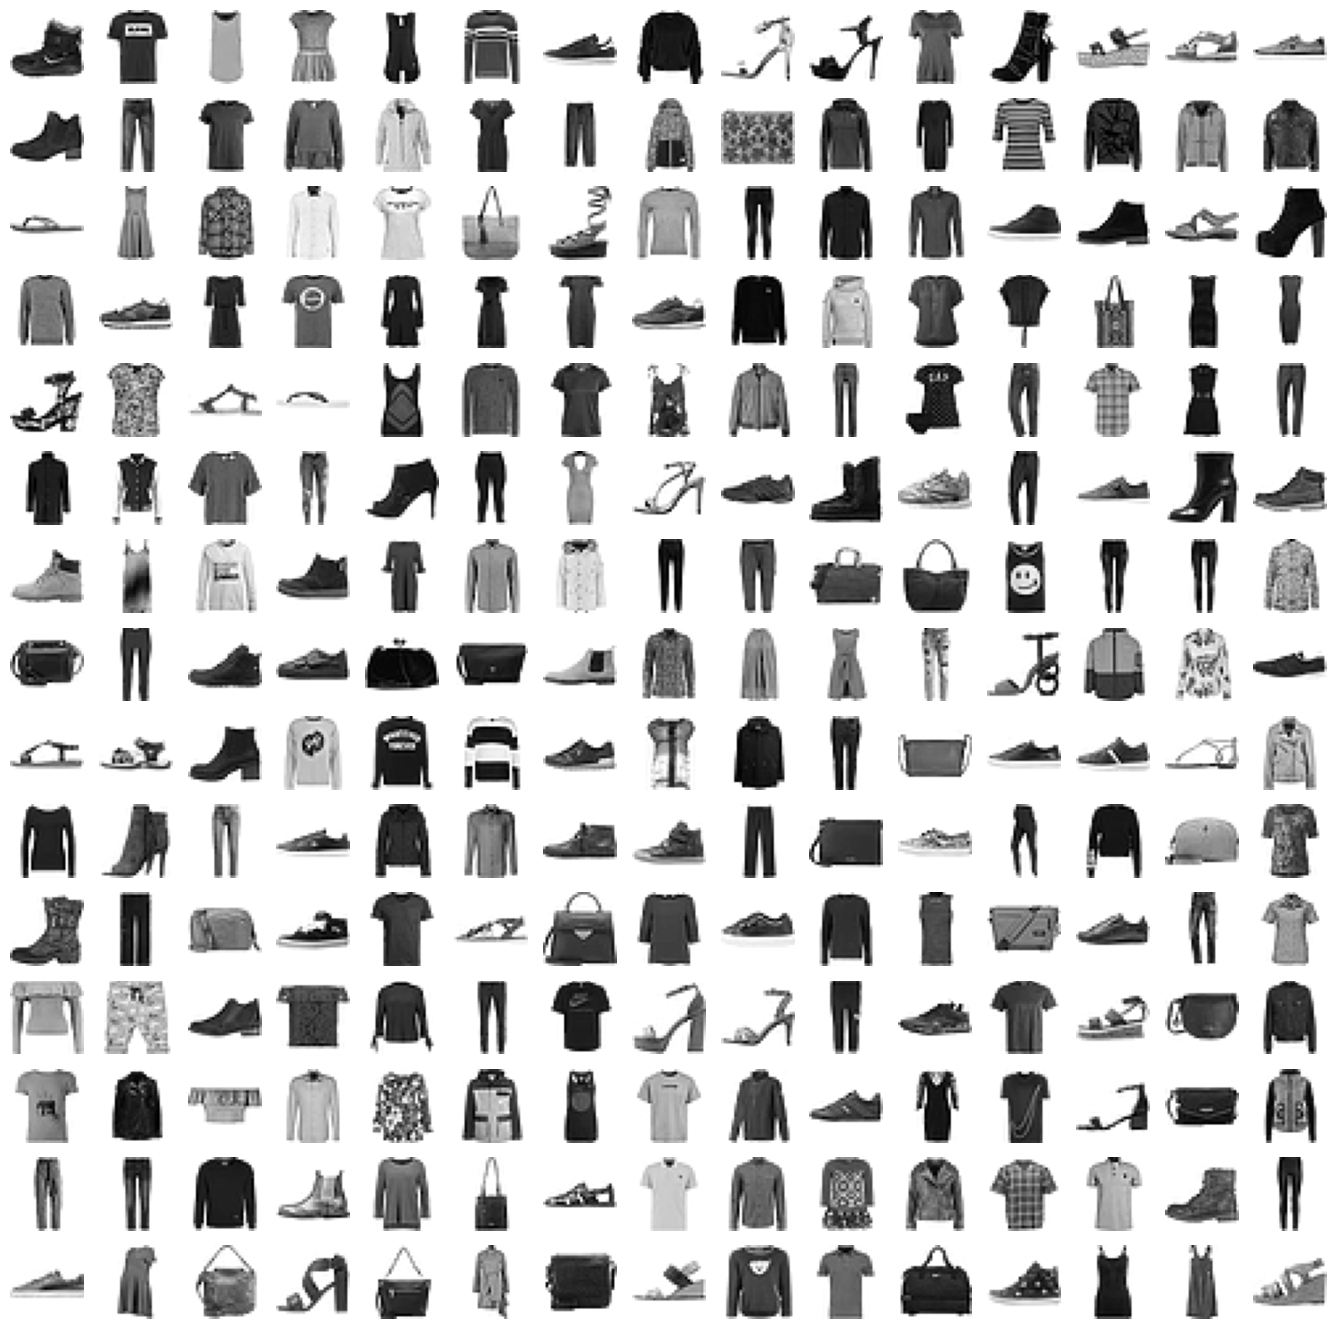

In [21]:
L_grid = 15
W_grid = 15
fig, axes = plt.subplots(L_grid,W_grid,figsize=(17,17))

axes = axes.ravel() 

for i in range(225):
    axes[i].imshow(X_train[i],cmap='gray_r')
    axes[i].axis('off')
plt.show()

In [22]:
import numpy as np
#샘플당 개수
#데이터프레임의 value_counts()와 같음
#이미지 데이터여서 넘파이를 사용함

np.unique(y_train,return_counts=True) # 클래스가 균형적이다.!!!

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

> 레이블 당 샘플개수가 각각 6000개씩 있어 균형잡힌 데이터입니다. 

## 데이터 전처리

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열인 각 샘플을 1차원으로 펼침

In [25]:
print(train_scaled.shape)

(60000, 784)


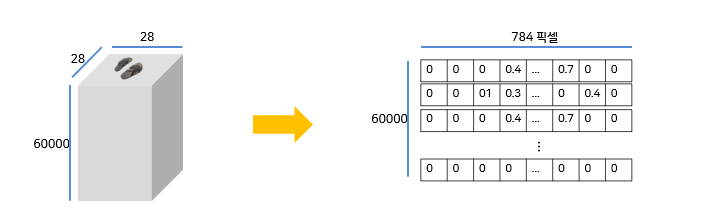

## 인공신경망(ANN)

* 선형방정식이 아닌 인공신경망으로 성능을 높여봅시다. 
* 클래스가 총 10개이므로 $z_{10}$까지 계산합니다. 
* $z_{1}$ ~ $z_{10}$을 계산하고 클래스를 예측하기 때문에 신경망의 최종 값을 만든다는 의미로 **출력층**이라고 부릅니다. 
* $z$값을 계산하는 단위를 **뉴런 또는 유닛**이라고 부릅니다.
* $x_{1}$ ~   $x_{784}$까지를 **입력측**이라고 합니다. 

* 즉, 입력층은 픽셀값 자체입니다. 

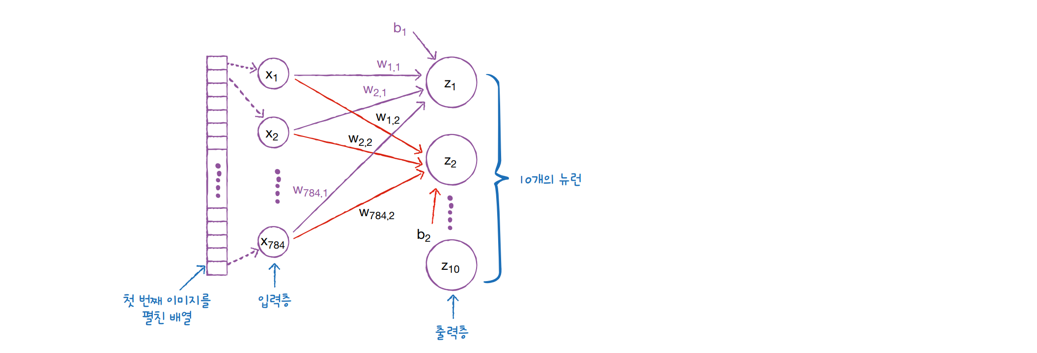

## 라이브러리 로드

In [26]:
import tensorflow as tf

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 신경망 구성하기

* 인공신경망에서는 교차검증을 수행하지 않음
* 딥러닝 분야는 일단 데이터양이 충분하기 때문이고,
* 교차검증은 수행시간이 길다는 특성 때문입니다. 
* 딥러닝은 안 그래도 수행시간이 긴데 말이죠~~

* 훈련데이터와 검증용 데이터를 분리해서 사용함

In [27]:
from sklearn.model_selection import train_test_split

#20% 검증데이터로 지정
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)

In [28]:
#훈련용 데이터 
print(train_scaled.shape, y_train.shape)

(48000, 784) (48000,)


In [29]:
#검증용 데이터
print(val_scaled.shape, y_val.shape)

(12000, 784) (12000,)


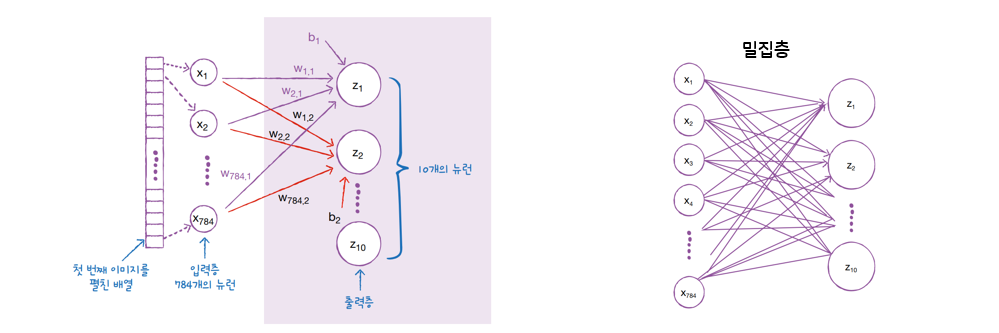

* 10개의 패션 아이템으로 분류하기 위해 10개의 뉴런으로 구성
* 784개의 픽셀과 오른쪽의 10개의 뉴런이 모두 연결되면 오른쪽 그림처럼 784x10 = 7840개의 연결된 선이 생기고
* 따라서 이를 빽빽해서 **밀집층**이라고 합니다.  
* 이런 층을 양쪽의 뉴런이 모두 연결하고 있기 때문에 **완전 연결층(fully connected layer)** 라고 부릅니다. 

```python
Dense(뉴런개수, activation=뉴런출력에 적용할 함수, input_shape=입력의 크기)
```

In [37]:
#신경망 모델 만들기
# activation = 'softmax'
model = Sequential()

In [38]:
#뉴런개수:10 -> 10개의 패션아이템 분류
#활성화함수: 뉴런에서 출력되는 값을 확률로 바꾸기 위해 소프트맥스 함수 사용(다중분류이기 때문)
#입력값크기: 784개의 픽셀값
model.add(Dense(10, activation='softmax', input_shape=(784,)))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


* 뉴런의 선형방정식 계산 결과에 적용되는 함수를 **활성화 함수**라고 부릅니다. 
* 인공신경망에 소프트맥수 이외에 다양한 활성화 함수가 존재합니다. 

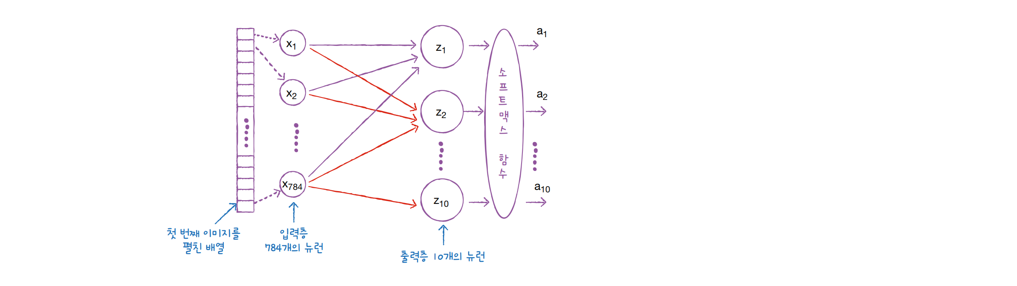

## 신경망 설정하기

* 손실함수 
    * 이진 분류: binary_crossentropy
    * 다중 분류: categorical_crossentropy (타깃값을 0,1로 이루어진 원-핫 인코딩으로 준비했다면)
    * 다중 분류: sparse_categorical_crossentropy(타깃값이 정수로 이루어 졌을 때)

* metrics:
    * 분류: accuracy
    * 회귀: mse

In [41]:
model.compile(loss='sparse_categorical_crossentropy' ,optimizer='adam',metrics=['accuracy'])

In [40]:
#타깃값이 정수로 이루어져 있음
y_train[:10] 

array([7, 3, 5, 8, 6, 9, 3, 3, 9, 9], dtype=uint8)

## 신경망 훈련하기

In [42]:
#전체 데이터 5번 반복훈련
epoch_hist = model.fit(train_scaled,y_train,epochs=5,batch_size=10)

Epoch 1/5
4800/4800 [==============================] - 6s 1ms/step - loss: 0.5633 - accuracy: 0.8074
Epoch 2/5
4800/4800 [==============================] - 6s 1ms/step - loss: 0.4533 - accuracy: 0.8440
Epoch 3/5
4800/4800 [==============================] - 6s 1ms/step - loss: 0.4323 - accuracy: 0.8512
Epoch 4/5
4800/4800 [==============================] - 7s 2ms/step - loss: 0.4194 - accuracy: 0.8550
Epoch 5/5
4800/4800 [==============================] - 7s 1ms/step - loss: 0.4134 - accuracy: 0.8564


## 신경망 평가하기

In [43]:
#검증세트로 평가하기
model.evaluate(val_scaled,y_val)

375/375 [==============================] - 1s 1ms/step - loss: 0.4495 - accuracy: 0.8410


[0.4495040774345398, 0.8410000205039978]

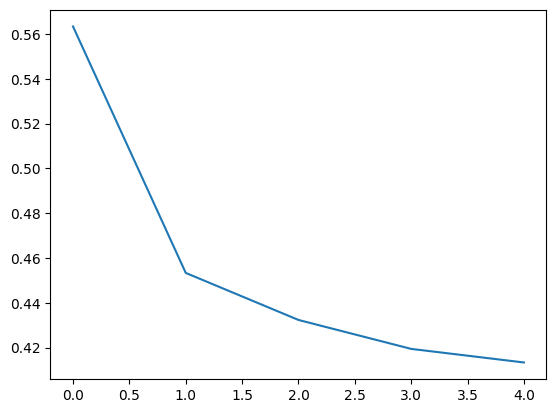

In [44]:
plt.plot(epoch_hist.history['loss'])

> 훈련세트에서의 점수보다 조금 낮다. <br> 

---

## 전체 코드

---